In [1]:
# Script only for checking diagnostics (ipm histograms, time tool ampl and fltpos histograms, adu histogram, ePix100 ROI check)

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from scipy.ndimage import rotate

import XSpect.XSpect_Diagnostics as dt
import psana as ps

print('-----------------')
print('Modules imported!')
print('-----------------')

-----------------
Modules imported!
-----------------


Run 46 imported


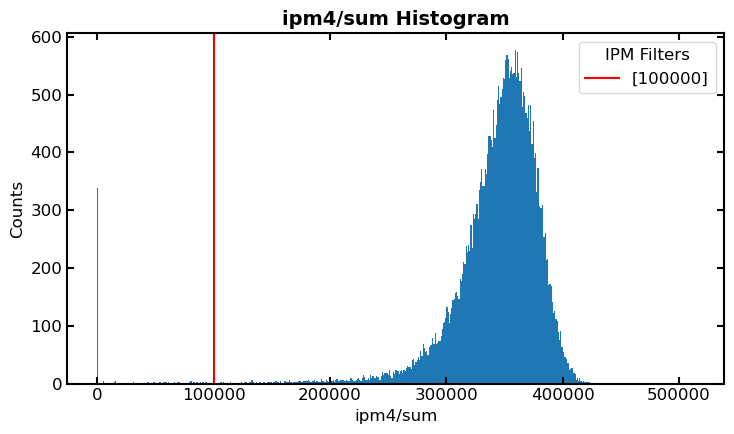

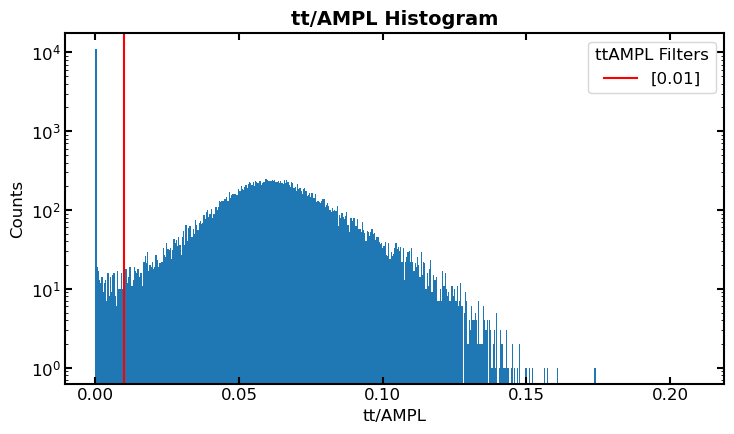

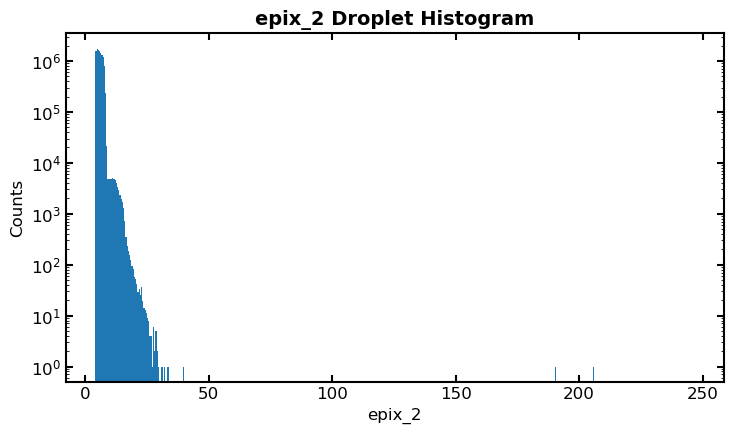

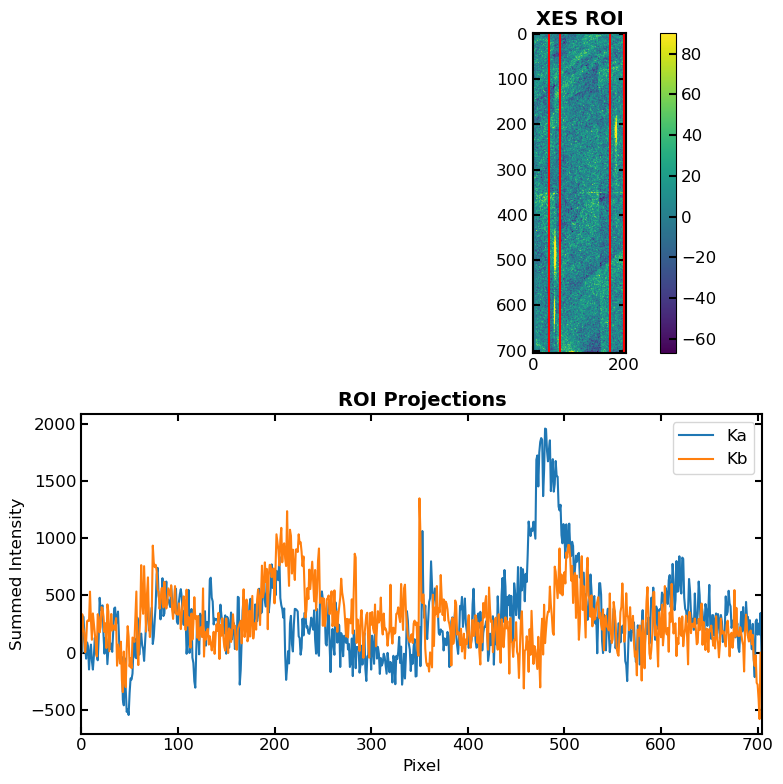

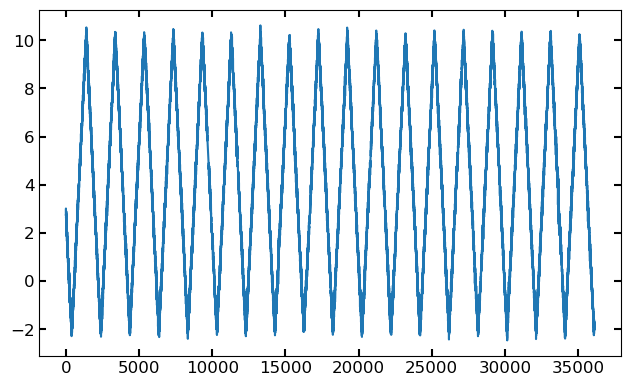

In [3]:
run = 46
exp = 'xcsl1049023'
keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_2/ROI_0_area'] 
names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']

d = dt.diagnostics(run, exp, keys, names)

ipm_thres = [100000]

d.ipm_histogram(ipm_thres)

tt_thres = [0.01]

d.ttAMPL_histogram(tt_thres)

d.droplet_histogram()

nshots = 1000
ka_roi = [35, 60]
kb_roi = [170, 200]

d.xes_ROI(nshots, ka_limits = ka_roi, kb_limits = kb_roi, angle = 0.5)

delay = d.h5[d.datadict['time_tool_correction']][:] + d.h5[d.datadict['lxt_ttc']][:] + d.h5[d.datadict['encoder']][:]

plt.plot(delay)